# **Breast_cancer_data**

Worldwide, breast cancer is the most common type of cancer in women and the second highest in terms of mortality rates.Diagnosis of breast cancer is performed when an abnormal lump is found (from self-examination or x-ray) or a tiny speck of calcium is seen (on an x-ray). After a suspicious lump is found, the doctor will conduct a diagnosis to determine whether it is cancerous and, if so, whether it has spread to other parts of the body.

**Importing important Libraries and Loading Dataset.**

Numpy:- In this Project we are using 'Numpy' Library for Numbers Operation here.

Pandas:- In this Project we are using 'Pandas' Library for EDA and data related task.

Matplotlib:- 'Matplotlib' we are using for Visualization Purpose.

Seaborn:- With the help of 'Seaborn' we can visualize the data in advanced form.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Loading the dataset
df = pd.read_csv('Breast_cancer_data.csv')
df

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness,diagnosis
0,17.99,10.38,122.80,1001.0,0.11840,0
1,20.57,17.77,132.90,1326.0,0.08474,0
2,19.69,21.25,130.00,1203.0,0.10960,0
3,11.42,20.38,77.58,386.1,0.14250,0
4,20.29,14.34,135.10,1297.0,0.10030,0
...,...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100,0
565,20.13,28.25,131.20,1261.0,0.09780,0
566,16.60,28.08,108.30,858.1,0.08455,0
567,20.60,29.33,140.10,1265.0,0.11780,0


In [3]:
df.isnull().sum()

mean_radius        0
mean_texture       0
mean_perimeter     0
mean_area          0
mean_smoothness    0
diagnosis          0
dtype: int64

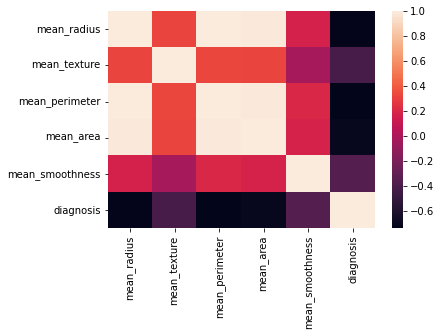

In [4]:
# Checking the Correalation between available column in dataset using heatmap (seaborn).

corr =df.corr()
sns.heatmap(corr)

In [5]:
#Seprating the feature X

X = df.iloc[:,:-1]
X

,mean_radius,mean_texture,mean_perimeter,mean_area,mean_smoothness
0,17.99,10.38,122.80,1001.0,0.11840
1,20.57,17.77,132.90,1326.0,0.08474
2,19.69,21.25,130.00,1203.0,0.10960
3,11.42,20.38,77.58,386.1,0.14250
4,20.29,14.34,135.10,1297.0,0.10030
...,...,...,...,...,...
564,21.56,22.39,142.00,1479.0,0.11100
565,20.13,28.25,131.20,1261.0,0.09780
566,16.60,28.08,108.30,858.1,0.08455
567,20.60,29.33,140.10,1265.0,0.11780


In [6]:
#Seprating the feature y

y = df.iloc[:,-1]
y

0      0
1      0
2      0
3      0
4      0
      ..
564    0
565    0
566    0
567    0
568    1
Name: diagnosis, Length: 569, dtype: int64

In [7]:
# Importing 'train_test_split' from sklearn library and spliting data into training and test part.

from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.2, random_state=0)

### **KNN**

In [8]:
#importing classification metrics
from sklearn.metrics import confusion_matrix,accuracy_score

In [9]:
from sklearn.neighbors import KNeighborsClassifier

In [10]:
# selecting the K value.

acc_list = []
err_list = []
for i in range(1,25):
    model = KNeighborsClassifier(n_neighbors=i)
    model.fit(X_train,y_train)
    y_pred = model.predict(X_test)
    acc = accuracy_score(y_test,y_pred)
#     print("For k = {}, accuracy = {}".format(i,acc))
    acc_list.append(acc)
    err_list.append(1-acc)

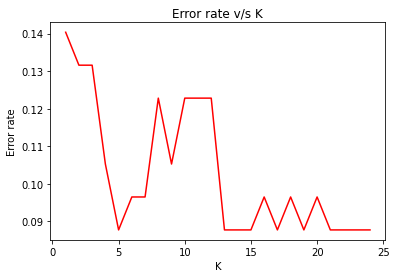

In [11]:
plt.plot(list(range(1,25)),err_list,c= 'r')
plt.title('Error rate v/s K')
plt.xlabel('K')
plt.ylabel('Error rate')
plt.show()

In [12]:
# here we are doing Model building
model = KNeighborsClassifier(n_neighbors=7)
model.fit(X_train,y_train)
y_pred = model.predict(X_test)

In [13]:
# evaluation of Model
confusion_matrix(y_test,y_pred)

array([[40,  7],
       [ 4, 63]])

In [14]:
accuracy_score(y_test,y_pred)

0.9035087719298246

## **DecisionTreeClassifier**

In [15]:
# Importing 'Decision Tree' from sklearn.

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

In [16]:
# Creating a Model in Decision Tree and then fitting it.

model = DecisionTreeClassifier()
model.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [17]:
# Checking the accuracy score on Test Data.

model.score(X_test, y_test)

0.8859649122807017

In [18]:
# Importing Support Vector Machine and using 'Classifier' from there. 

from sklearn.svm import SVC

**support vector classifier**

In [19]:
# Creating a Class with and and using support vector classifier on that.

support_vector_classifier = SVC(C=30.0)

In [20]:
# Fitting up the Model on training dataset.

support_vector_classifier.fit(X_train, y_train)

SVC(C=30.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
# Checking the acccuracy score if test data set.

support_vector_classifier.score(X_test, y_test)

0.9122807017543859

**As we have use few algorithm here. So you can see the better accuracy level according to algorithm below:**

KNeighborsClassifier :- As you have seen above in 'KNeighborsClassifier' it's providing accuracy level = 90%.

DecisionTreeClassifier :- As you have seen above in 'DecisionTreeClassifier' it's providing accuracy level = 88%.

support vector classifier :- As you have seen above in 'support vector classifier' it's providing accuracy level = 91%.

Note:- So as it clearly mentioned that we are getting higher accuracy level from 'KNeighborsClassifier' and 'support vector classifier' So we'll use it for our Model.